# Programa para webScraping do site IMDB: Top 250.
# IMDB:Top 250 WebScrapping program.


Importação das bibliotecas utilizadas + crianção de duas funções( Uma para a regularização do HTML e outro para plotagem gráfica)
Import of used libraries + creation of two functions (One for HTML regularization and another for  graphic plotting)

In [58]:
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen,urlretrieve
from matplotlib import pyplot as plt
import seaborn as sns
def tratamento_url_pt(x):
    return " ".join(x.read().decode('utf-8').split()).replace("> <","><") 
def plotar(titulo,labelx,labely,x,y,dataset):
  sns.set_palette('Accent')
  sns.set_style("darkgrid")
  graph = sns.scatterplot(x=x,y=y,data=dataset)
  graph.figure.set_size_inches(12,6)
  graph.set_title(titulo, loc='left', fontsize=18)
  graph.set_xlabel(labelx,fontsize=14)
  graph.set_ylabel(labely,fontsize=14)
  graph=graph
  return graph

Inicialização, tratamento e extração da url.
Inicialization, treatment and extration of the url.

In [52]:
url = urlopen('https://www.imdb.com/chart/top/')
html = tratamento_url_pt(url)
soup = BeautifulSoup(html,'html.parser')
table = soup.table
name,year,ranking,director,cast,number_of_votes,list_img=[],[],[],[],[],[],[]
movies = table.findAll('td', class_='titleColumn')
ranks = table.findAll('td', class_= 'ratingColumn imdbRating')
image = table.findAll('td', class_='posterColumn')

In [53]:
for movie in movies:
    name.append(movie.a.getText())
    year.append(movie.span.getText().strip('()'))
    director.append(((movie.a.get('title')).split(','))[0])
    cast.append(((movie.a.get('title')).split(','))[1:])
for rank in ranks:
    ranking.append(rank.getText())
    number_of_votes.append(rank.strong.get('title').split(' ')[3].strip(','))
for imgs in image:
    list_img.append((imgs.a.img.get('src')))

In [54]:
c = ','
number_of_votes_treated = []
for number in number_of_votes:
    for x in range(len(c)):
        number = number.replace(c[x],"")
        number_of_votes_treated.append(number)

In [55]:
scrap = {'nome':name,'ano':year,'nota':ranking,'numero de votos':number_of_votes_treated,'diretor':director,'elenco':cast,'poster':list_img,}


# Criação do DataFrame e análise.
# DataFrame's criation and analization.

In [56]:
data = pd.DataFrame(scrap)
data.set_index('nome', inplace = True)
data = data.astype({'ano':'int','nota':'float','numero de votos':'int'})

In [57]:
data


,ano,nota,numero de votos,diretor,elenco,poster
nome,,,,,,
Um Sonho de Liberdade,1994,9.2,2580513,Frank Darabont (dir.),"[ Tim Robbins, Morgan Freeman]",https://m.media-amazon.com/images/M/MV5BMDFkYT...
O Poderoso Chefão,1972,9.2,1776591,Francis Ford Coppola (dir.),"[ Marlon Brando, Al Pacino]",https://m.media-amazon.com/images/M/MV5BM2MyNj...
Batman: O Cavaleiro das Trevas,2008,9.0,2549592,Christopher Nolan (dir.),"[ Christian Bale, Heath Ledger]",https://m.media-amazon.com/images/M/MV5BMTMxNT...
O Poderoso Chefão II,1974,9.0,1228199,Francis Ford Coppola (dir.),"[ Al Pacino, Robert De Niro]",https://m.media-amazon.com/images/M/MV5BMWMwMG...
12 Homens e uma Sentença,1957,8.9,762100,Sidney Lumet (dir.),"[ Henry Fonda, Lee J. Cobb]",https://m.media-amazon.com/images/M/MV5BMWU4N2...
...,...,...,...,...,...,...
Aladdin,1992,8.0,401883,Ron Clements (dir.),"[ Scott Weinger, Robin Williams]",https://m.media-amazon.com/images/M/MV5BY2Q2ND...
Histórias Cruzadas,2011,8.0,449176,Tate Taylor (dir.),"[ Emma Stone, Viola Davis]",https://m.media-amazon.com/images/M/MV5BMTM5OT...
A Bela e a Fera,1991,8.0,441203,Gary Trousdale (dir.),"[ Paige O'Hara, Robby Benson]",https://m.media-amazon.com/images/M/MV5BMzE5MD...


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, Um Sonho de Liberdade to Dança com Lobos
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ano              250 non-null    int32  
 1   nota             250 non-null    float64
 2   numero de votos  250 non-null    int32  
 3   diretor          250 non-null    object 
 4   elenco           250 non-null    object 
 5   poster           250 non-null    object 
dtypes: float64(1), int32(2), object(3)
memory usage: 11.7+ KB


In [9]:
data.describe().round(2)

,ano,nota,numero de votos
count,250.00,250.00,250.00
mean,1986.06,8.25,614580.06
std,25.10,0.24,498026.95
min,1921.00,8.00,28129.00
25%,1966.00,8.10,216953.00
50%,1993.50,8.20,477261.50
75%,2006.00,8.40,928970.75
max,2022.00,9.20,2580301.00


Analise de quantos filmes de cada ano tem no DataFrame.
Analysis of how many year's movies are in the DataFrame

In [28]:
anos=[]
soma = 0
for ano in data['ano']:
   anos.append(ano)
anos = sorted(anos)
count_ano = {i:anos.count(i) for i in anos}
count_ano

{1921: 1,
 1924: 1,
 1925: 1,
 1926: 1,
 1927: 1,
 1928: 1,
 1931: 2,
 1934: 1,
 1936: 1,
 1939: 3,
 1940: 3,
 1941: 1,
 1942: 2,
 1944: 1,
 1946: 2,
 1948: 2,
 1949: 1,
 1950: 3,
 1952: 2,
 1953: 2,
 1954: 4,
 1955: 2,
 1957: 6,
 1958: 1,
 1959: 4,
 1960: 2,
 1961: 2,
 1962: 3,
 1963: 2,
 1964: 1,
 1965: 2,
 1966: 3,
 1967: 1,
 1968: 2,
 1971: 1,
 1972: 1,
 1973: 2,
 1974: 2,
 1975: 5,
 1976: 3,
 1977: 1,
 1978: 1,
 1979: 3,
 1980: 4,
 1981: 2,
 1982: 3,
 1983: 2,
 1984: 3,
 1985: 3,
 1986: 3,
 1987: 1,
 1988: 4,
 1989: 2,
 1990: 2,
 1991: 3,
 1992: 3,
 1993: 4,
 1994: 5,
 1995: 8,
 1996: 2,
 1997: 5,
 1998: 5,
 1999: 5,
 2000: 5,
 2001: 5,
 2002: 4,
 2003: 6,
 2004: 7,
 2005: 3,
 2006: 4,
 2007: 5,
 2008: 3,
 2009: 6,
 2010: 5,
 2011: 5,
 2012: 3,
 2013: 4,
 2014: 5,
 2015: 4,
 2016: 4,
 2017: 3,
 2018: 4,
 2019: 6,
 2020: 2,
 2021: 1,
 2022: 1}

Análise dos filmes que estão acima da média do DataFrame.
Analysis of movies that are above DataFrame's avarage.

In [10]:
mean = round(data['nota'].mean(),2)
count_mean = data.query('nota > @mean')['ano']
count_mean

nome
Um Sonho de Liberdade                1994
O Poderoso Chefão                    1972
Batman: O Cavaleiro das Trevas       2008
O Poderoso Chefão II                 1974
12 Homens e uma Sentença             1957
                                     ... 
Lawrence da Arábia                   1962
M, o Vampiro de Dusseldorf           1931
A Caça                               2012
Intriga Internacional                1959
Homem-Aranha: Sem Volta para Casa    2021
Name: ano, Length: 99, dtype: int32

In [11]:
len(count_mean)

99

Contagem de quantidade de filme por nota.
 Movie quantity count per note.

In [22]:
notas=[]
for nota in data['nota']:
    notas.append(nota)
count_nota = {i:notas.count(i) for i in notas}
count_nota

{9.2: 2,
 9.0: 2,
 8.9: 4,
 8.8: 4,
 8.7: 5,
 8.6: 11,
 8.5: 17,
 8.4: 20,
 8.3: 34,
 8.2: 44,
 8.1: 67,
 8.0: 40}

Organização e rankeamento do DataFrame em relação à quantidade de votos.
DataFrame Organization and ranking in relation to the number of votes.

In [13]:
data_rank = pd.DataFrame(({'nome':name,'numero de votos':number_of_votes_treated,'ano':year}))
data_rank.set_index('nome', inplace = True)
data_rank = data_rank.astype({'ano':'int','numero de votos':'int'})
data_rank['rank de N de votos'] = data_rank['numero de votos'].rank(ascending=False)
data_rank = data_rank.sort_values('numero de votos',ascending=False)
data_rank = data_rank.astype({'rank de N de votos':'int'})
data_rank

,numero de votos,ano,rank de N de votos
nome,,,
Um Sonho de Liberdade,2580301,1994,1
Batman: O Cavaleiro das Trevas,2549344,2008,2
A Origem,2264555,2010,3
Clube da Luta,2030987,1999,4
Forrest Gump: O Contador de Histórias,1990525,1994,5
...,...,...,...
Ser ou Não Ser,35896,1942,246
Rififi,33773,1955,247
A Canção da Estrada,31306,1955,248


Plotagem.
Plotting.

<AxesSubplot:title={'left':'Variação nota x ano'}, xlabel='Nota', ylabel='Ano'>

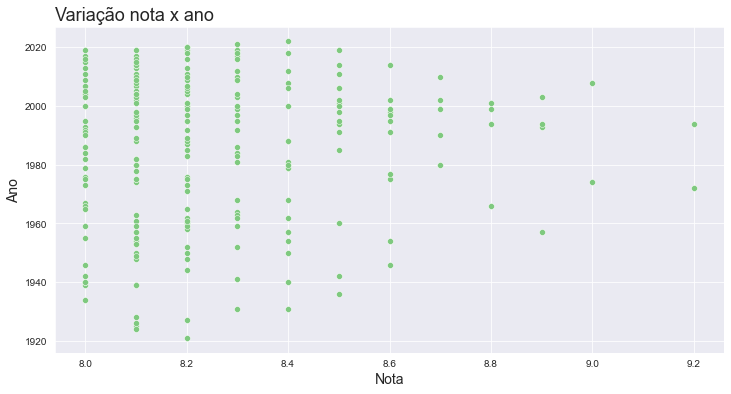

In [16]:
plotar('Variação nota x ano','Nota','Ano', data['nota'],data['ano'],data)

<AxesSubplot:title={'left':'Variação engajamento x ano'}, xlabel='Ano', ylabel='Engajamento'>

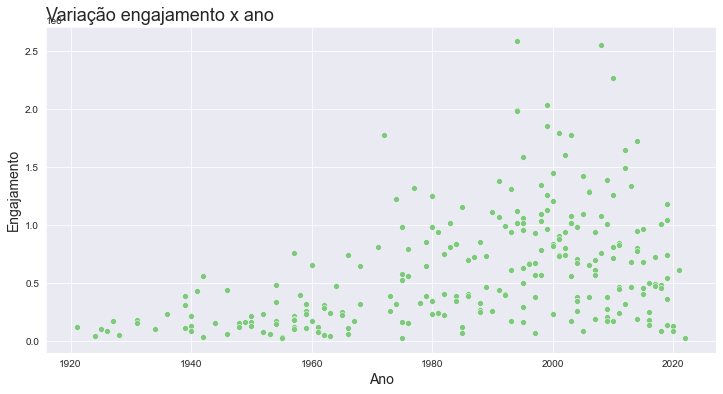

In [23]:
plotar('Variação engajamento x ano','Ano','Engajamento',data_rank['ano'], data_rank['numero de votos'],data_rank)


DataFrame da média de votos por ano.
DataFrame of the average votes per year.

In [19]:
data_mean = data.groupby(['ano']).mean().round(2)
data_mean['rank nota'] = data_mean['nota'].rank(ascending=False)
data_mean['rank N de votos'] = data_mean['numero de votos'].rank()
data_mean = data_mean.sort_values('nota',ascending=False)
data_mean = data_mean.astype({'numero de votos':'int','rank nota':'int','rank N de votos':'int'})
data_mean


,nota,numero de votos,rank nota,rank N de votos
ano,,,,
1972,9.20,1776471,1,86
1994,8.78,1739372,2,85
1977,8.60,1319299,3,82
1974,8.55,773662,4,66
1999,8.52,1447837,5,83
...,...,...,...,...
2015,8.07,629949,81,58
1982,8.07,461301,81,41
1955,8.05,32539,84,2


Plotagem e visualização dos dados das médias.
Ploting and visualization of the mean data.

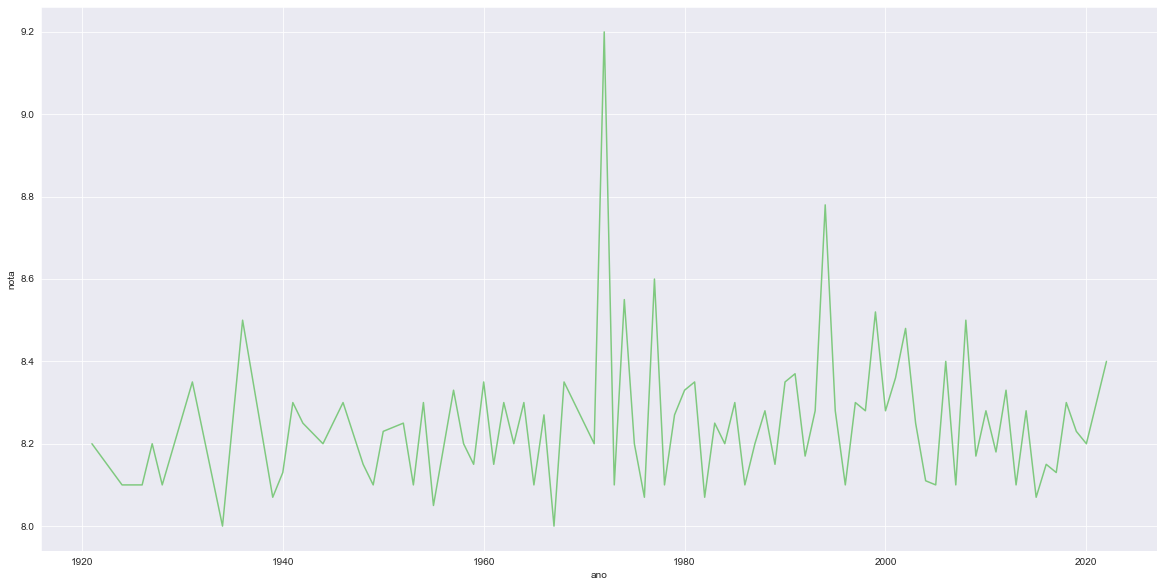

In [21]:
plt.figure(figsize=(20,10))
sns.lineplot(data=data_mean, x=data_mean.index, y='nota')
plt.show()

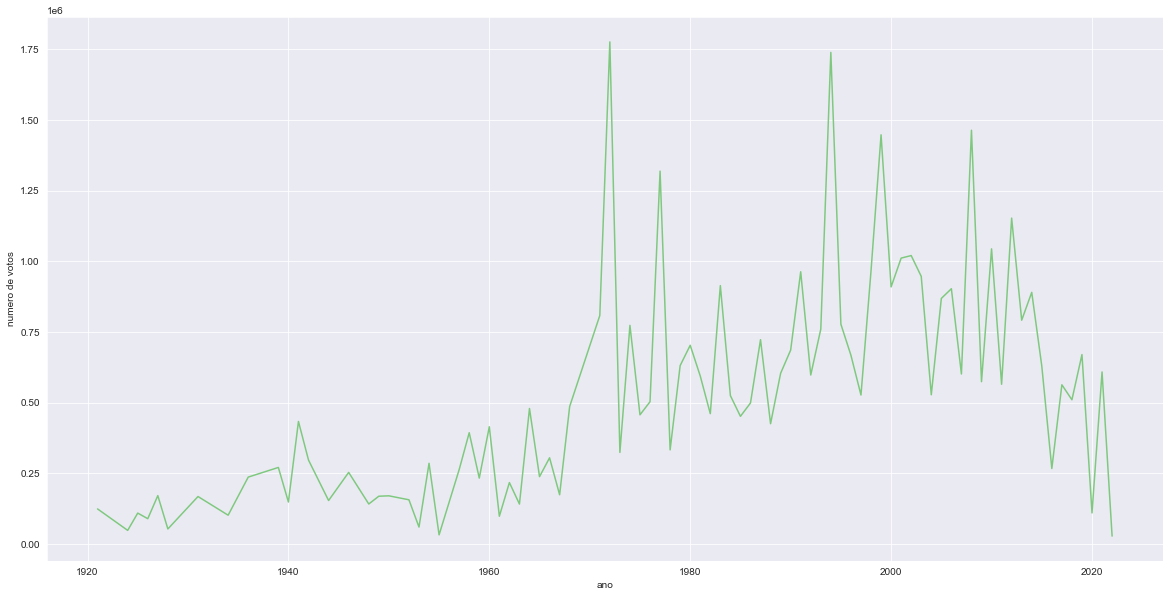

In [26]:
plt.figure(figsize=(20,10))
sns.lineplot(data=data_mean, x=data_mean.index, y='numero de votos')
plt.show()